In [2]:
import gudhi as gd

In [6]:
st = gd.SimplexTree()
st.insert([0, 1, 2])
st.insert([1, 3])
st.insert([2, 3])

True

Hardcode: Source is always bottom-left, target is always top right. So always six filtration points

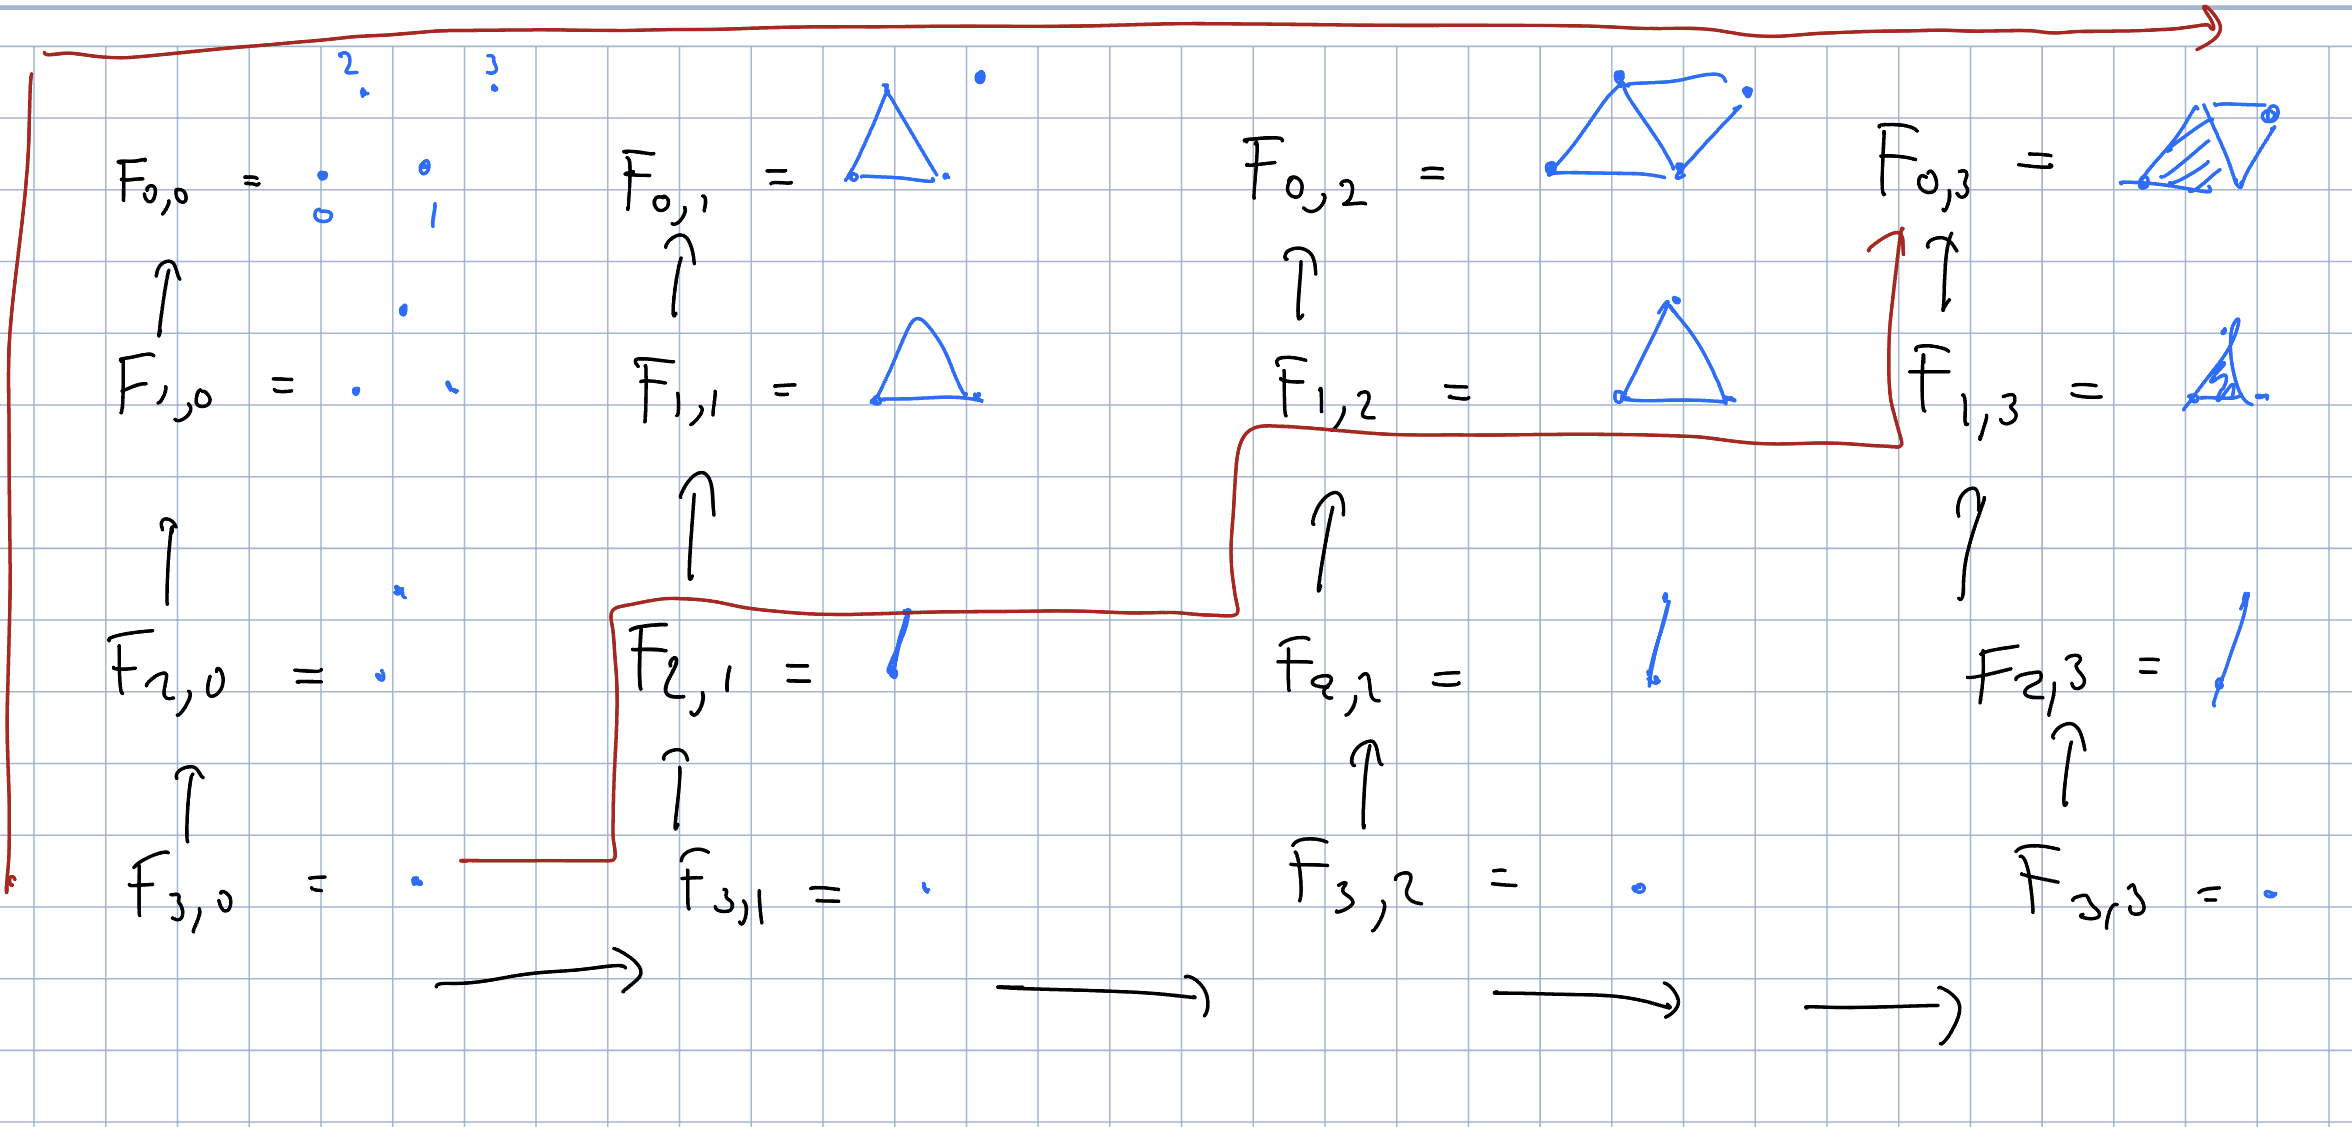

We first create some grid using lists in lists where each location will have the list of simplices of the simplicial complex of that filtration point.

In [13]:
# Create grid
grid = []
width = 4
height = 4
for i in range(height):
    row = []
    for j in range(width):
        row.append(0)
    grid.append(row)
grid

[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]


In [20]:
# Insert the bipersistence module/poset

# Column 1
grid[0][0] = [[0]]
grid[1][0] = [[0], [1]]
grid[2][0] = [[0], [1], [2]]
grid[3][0] = [[0], [1], [2], [3]]

# Column 2
grid[0][1] = [[0]]
grid[1][1] = [[0], [1], [0,1]]
grid[2][1] = [[0], [1], [2], [0,1], [0,2], [1,2]]
grid[3][1] = [[0], [1], [2], [3], [0,1], [0,2], [1,2]]

# Column 3
grid[0][1] = [[0]]
grid[1][1] = [[0], [1], [0,1]]
grid[2][1] = [[0], [1], [2], [0,1], [0,2], [1,2]]
grid[3][1] = [[0], [1], [2], [3], [0,1], [0,2], [1,2], [1,3], [2,3]]

# Column 4
grid[0][1] = [[0]]
grid[1][1] = [[0], [1], [0,1]]
grid[2][1] = [[0], [1], [2], [0,1], [0,2], [1,2], [0,1,2]]
grid[3][1] = [[0], [1], [2], [3], [0,1], [0,2], [1,2], [0,1,2], [1,3], [2,3]]

Now, we create some way to choose a path.